# 인공 신경망

## 패션 MNIST

### MNIST란?
* 프로그램 언어를 처음 배울 때 Hello World!라는 문구를 출력하듯이 딥러닝을 시작하면 사용하는 데이터셋이 MNIST입니다. 
* 이 데이터는 손으로 쓴 0 ~ 9 까지의 숫자로 이루어져 있습니다. 
* MNIST와 크기, 개수가 동일하지만 숫자 대신 패션 아이템으로 이루어진 데이터가 바로 패션 MNIST임 

## 딥러닝 프레임워크

### Tensorflow
* 구글이 2011년 개발을 시작하여 2015년에 오픈 소스로 공개한 기계학습 라이브러리. 
* 일반인들도 사용하기 쉽도록 다양한 기능들을 제공한다. 
* 다수의 언어를 지원하지만 파이썬 관련 자료가 가장 많다.
* 1.x 버전의 복잡한 코드때문에 Keras를 사용하여 사용하는 경우가 많음. 
* 2.x 버전에서는 Keara를 흡수하여 통합함

### Pytorch

* Python 머신러닝 라이브러리 
* torch를 기반으로 하며, 자연어 처리와 같은 애플리케이션에서 많이 활용되고 있음 
* 페이스북 AI 리서치 랩에서 개발함

### Tensorflow VS Pytorch

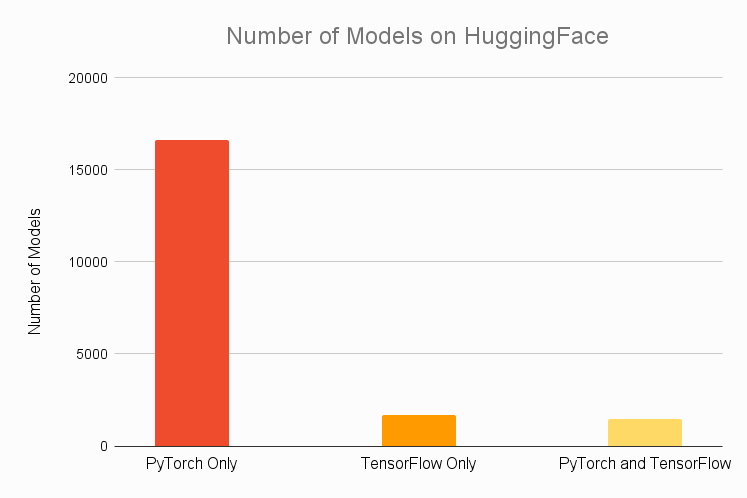

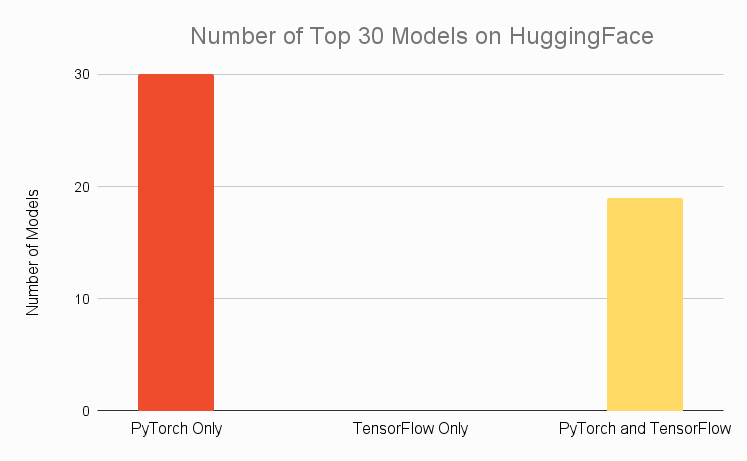

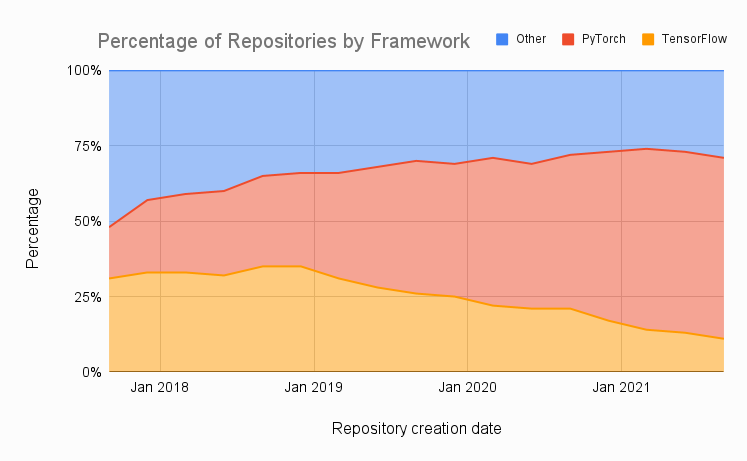

# 실습
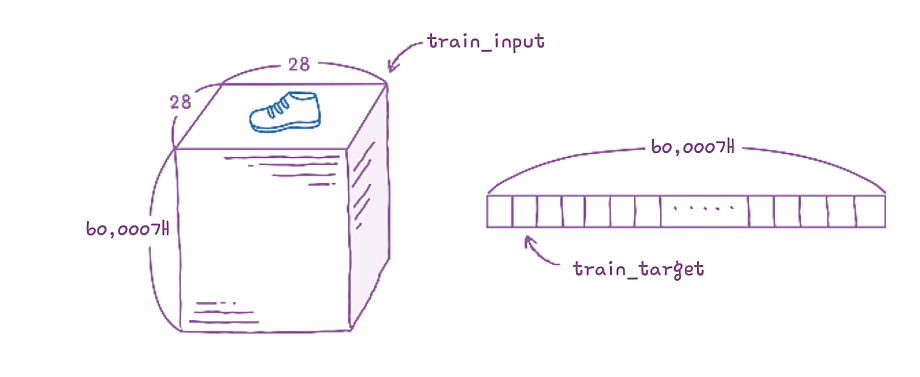

* 훈련 데이터는 60,000개의 이미지로 이루어짐. 
* 각 이미지의 크기는 28 x 28
* 타킷도 60,000개의 원소가 있는 1차원 배열

In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## 데이터의 Label 값 확인하기 
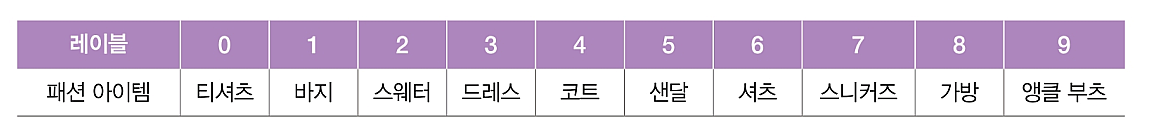

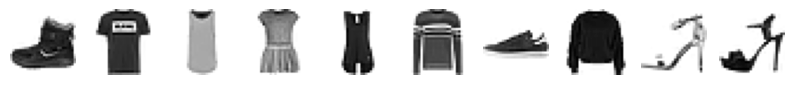

In [3]:
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [4]:
# label의 unique한 값을 출력 
np.unique(train_target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
# 훈련 데이터 세트의 label(target) 값을 순차적으로 출력하여 값이 랜덤한지 확인합니다. 
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


* 각각의 레이블 값마다 6,000개의 샘플이 들어 있음

In [6]:
# 각각 label 마다 몇 건의 데이터가 존재하지는 확인 
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


## 로지스틱 회귀로 패션 아이템 분류하기

### 정규화
* 이미지의 경우 픽셀 값이 0 ~ 255 사이의 정수값을 가짐 
* 255로 나누어 0 ~ 1 사이의 값으로 정규화함 
### 딥러닝에서 정규화해야 하는 이유 
* 확률적 경사 하강법은 기울기가 가장 가파른 방향으로 따라 이동하는데 만약 특성마다 값의 범위가 많이 다르면 올바르게 손실 함수의 경사를 내려올 수 없고, 또한 시간이 많이 걸림

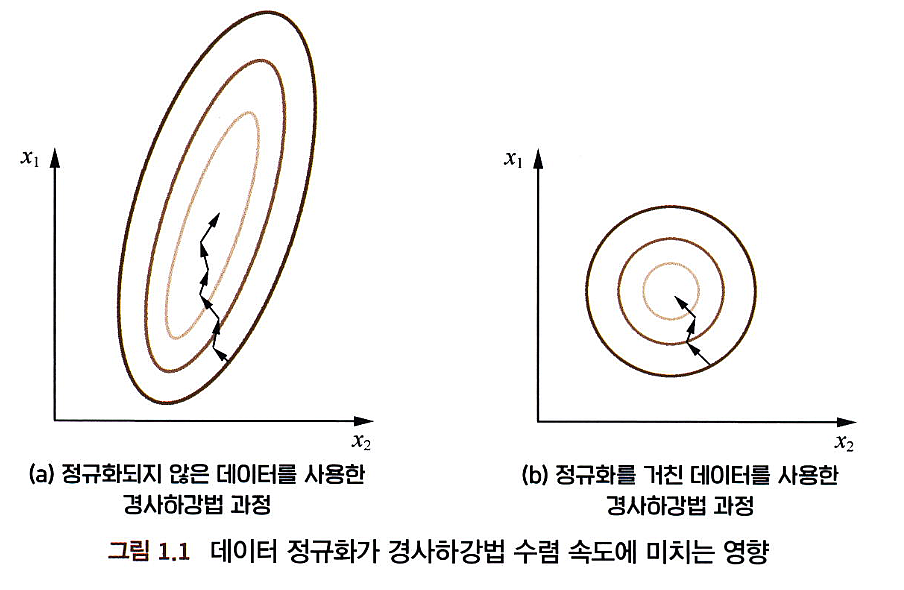

In [9]:
# 28 x 28의 픽셀 값을 784개로 flatten 한다. 
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

print(train_scaled.shape)

(60000, 784)


In [10]:
train_target

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

* SGDClassifier 클래스의 loss 매개변수를 'log'로 지정하여 로지스틱 손실 함수를 최소화하는 확률적 경사 하강법을 사용 
* SGDClassifier의 객체를 만들 때 2개의 매개변수를 지정
* loss는 손실 함수의 종류
    * log로 지정하여 로지스틱 손실 함수를 지정 
* max_iter는 수행할 에폭(epoch) 횟수를 지정 
    * 너무 많이 epoch 숫자를 넣으면 과적합이 일어남

In [11]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=5, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

/Users/happyeon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/happyeon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/happyeon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/happyeon/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
 

0.8197666666666666


## 로지스틱을 사용한 다중 분류 모델의 수식 확인하기 
* 각각의 레이블 값을 예측하기 위해서는 다른 가중치와 절편을 사용해야 함

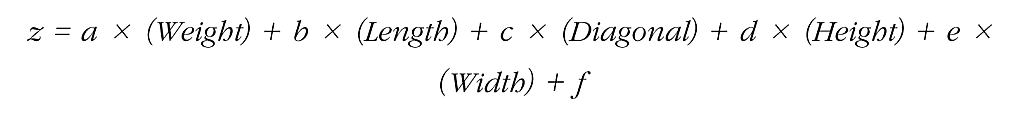


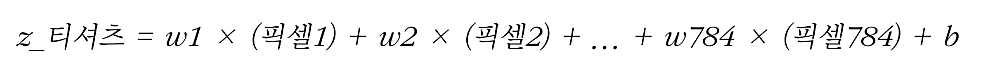

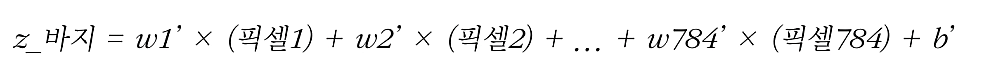

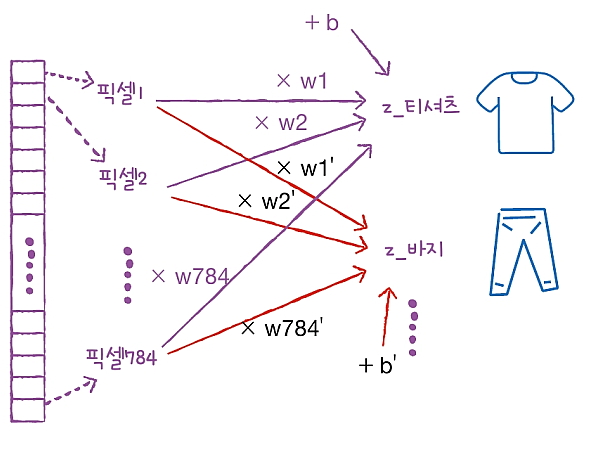

* 10개의 클래스에 대한 선형 방정식을 모두 계산한 다음에는 소프트맥스 함수를 사용하여 각 클래스에 대한 확률을 얻음 

# 인공신경망 

* 가장 기본적인 인공 신경망은 확률적 경사 하강법을 사용하는 로지스틱 회귀와 같습니다. 
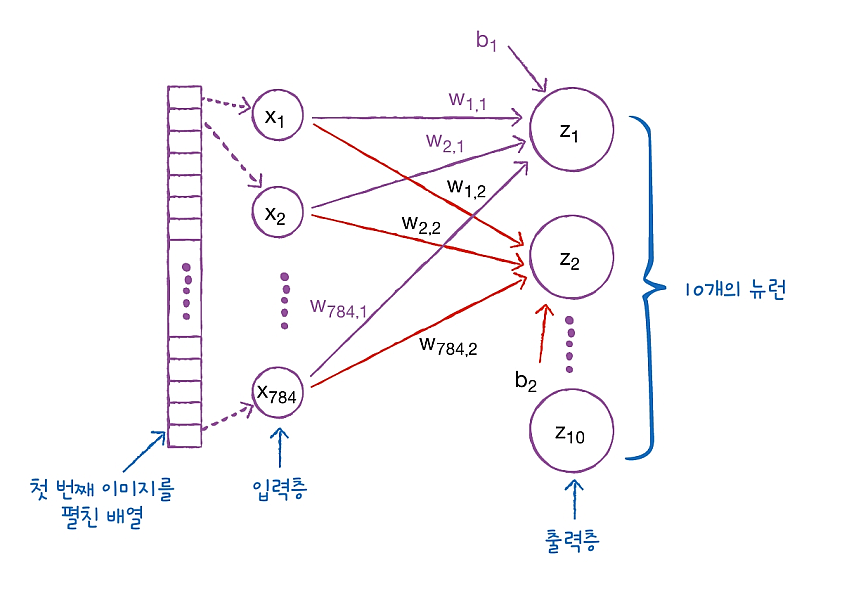

* $ z_1 $ ~ $ z_{10} $을 계산하고 이를 바탕으로 클래스를 예측하기 때문에 신경망의 최종 값을 만든다는 의미에서 출력층(output layer)라고 부릅니다. 
* z를 값을 계산하는 단위를 뉴런이라고 부릅니다. 
* 뉴런에서 일어나는 일은 선형 계산이 전부!! 뉴런이라는 표현 대신에 unit 혹은 node라고도 표현합니다. 
* $ x_1 $  ~ $ x_{784} $  까지를 입력층(input layer)이라고 부릅니다. 


### 텐서플로와 케라스

* 텐서플로에는 저수준 API와 고수준 API가 있습니다. 
* 케라스는 고수준 API입니다. 
* 2015년 3월 프랑소와 숄레가 만든 딥러닝 라이브러리입니다. 
* 케라스는 직접 GPU 연산을 사용하지 않고 대신 GPU연산을 수행하는 다른 라이브러리를 백엔드로 사용합니다. 
    * Theano, CNTK와 같은 여러 딥러닝 라이브러리를 백엔드로 사용할 수 있음

## 인공신경망으로 모델 만들기

* 인공신경망에서는 교차 검증을 잘 사용하지 않고 검증 셋을 별도로 덜어내어 사용 

1. 딥러닝 분야의 데이터셋은 충분한 크기 때문에 검증 점수가 안정적이고

2. 교차 검증을 수행하기에는 훈련 시간이 너무 오래 걸리기 때문

In [12]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [13]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
model = keras.Sequential(dense)
model.summary()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


2023-04-19 10:58:39.620007: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-19 10:58:39.620161: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


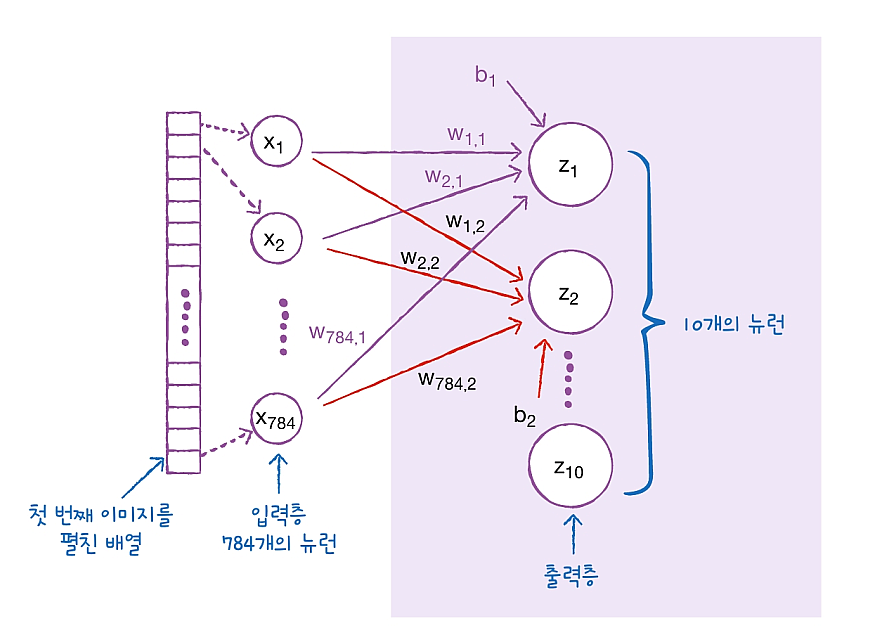

* 가장 기본이 되는 층은 밀집층(dense layer)입니다. 
* 아래 그림처럼 왼쪽의 노드와 오른쪽의 노드가 모두 연결되어 있습니다. 

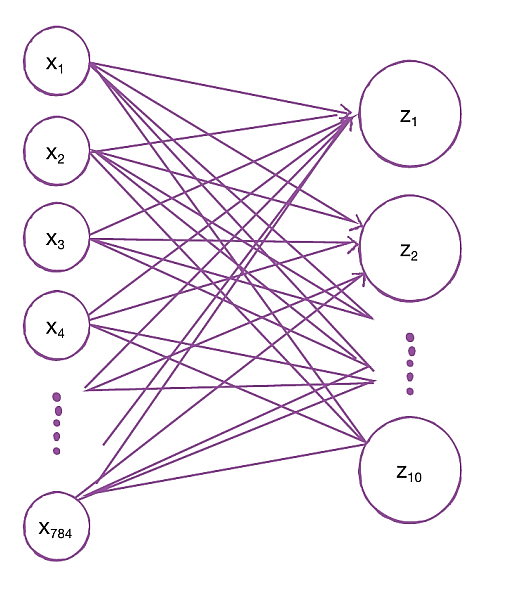

* 이런 층을 양쪽의 뉴런이 모두 연결하고 있기 때문에 완전 연결층(fully connected layer)라고 부릅니다. 

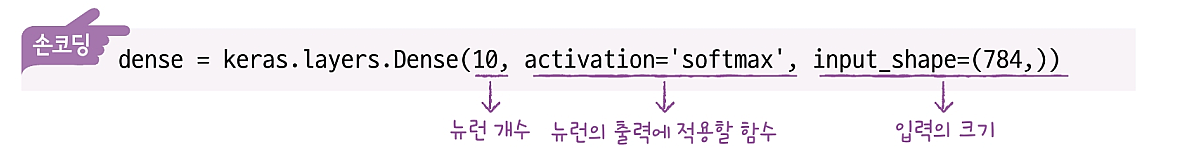

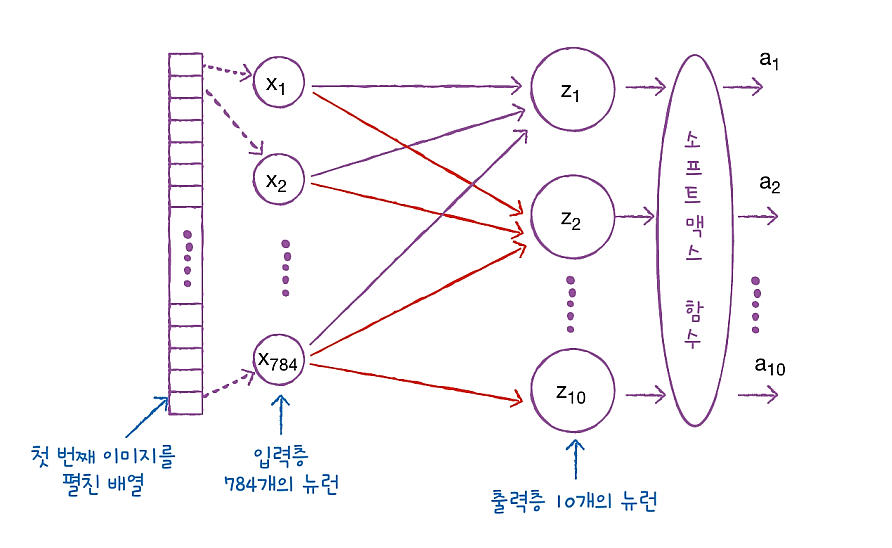

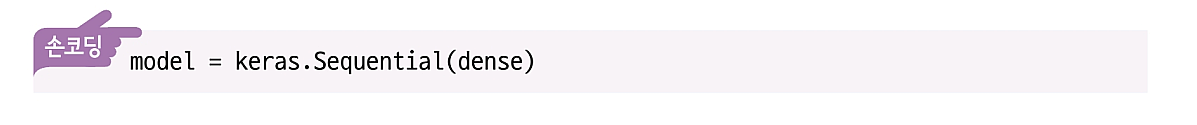

* sequential 클래스의 객체를 만들 때 앞에서 만든 밀집층의 객체 dense를 전달
* 여기서 만든 model 객체가 바로 신경망 모델
* 절편(bias)가 뉴런마다 더해진다는 것을 꼭 명심 
* 소프트맥스와 같이 뉴런의 선형 방정식 계산 결과에 적용되는 함수를 활성화 함수(activation function)이라고 함

## 인공신경망으로 패션 아이템 분류하기

* 케라스 모델은 훈련하기 전에 설정해야 하는 단계가 존재 
* 이런 설정을 model 객체의 compile() 메서드에서 수행 
* 손실 함수의 종류도 여기서 지정 
#### 손실함수
* 이진 분류 : 'binary_crossentropy'
* 다중 분류 : 'categorical_crossentropy'

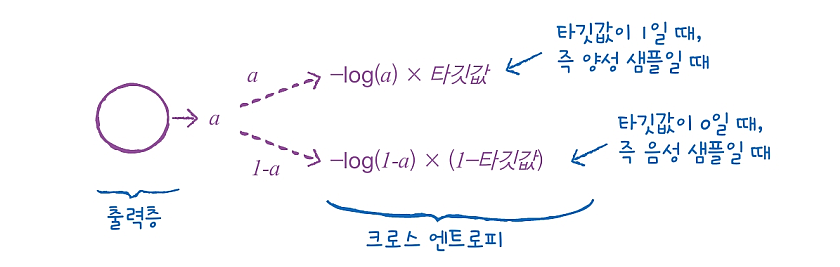

#### sparse의 의미

* 다중 분류 문제에서 크로스 엔트로피  손실 계산

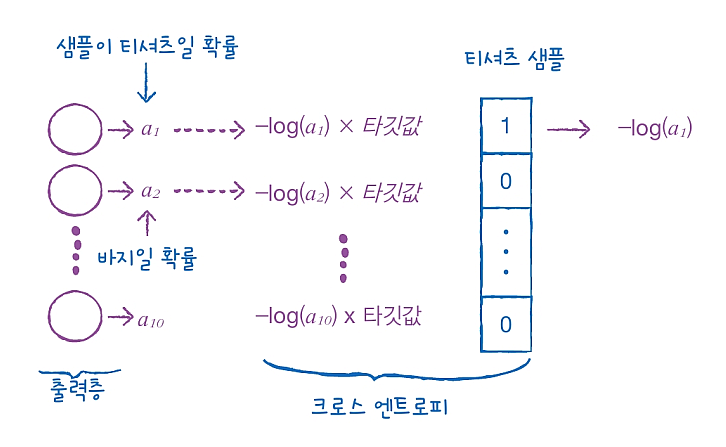

* 출력층은 10개의 뉴런이 있고 10개의 클래스에 대한 확률을 출력
* 첫 번째 뉴런은 티셔츠일 확률이고 두 번째 뉴런은 바지일 확률을 출력 
* 이진 분류와 달리 각 클래스에 대한 확률이 모두 출력되지 때문에 타깃에 해당하는 확률만 남겨 놓기 위해서 나머지 확률에는 모두 0을 곱함

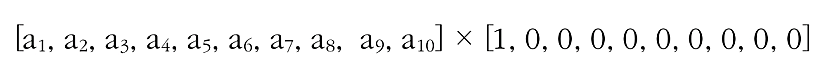

* 해당 레이블의 샘플을 정확하게 분류하려면 신경망이 해당 출력을 가능한 한 높여야 한다. 
* 이때 타깃값에 해당하는 클래스만 1로 설정하고 나머지는 모두 0인 one-hot encoding을 사용

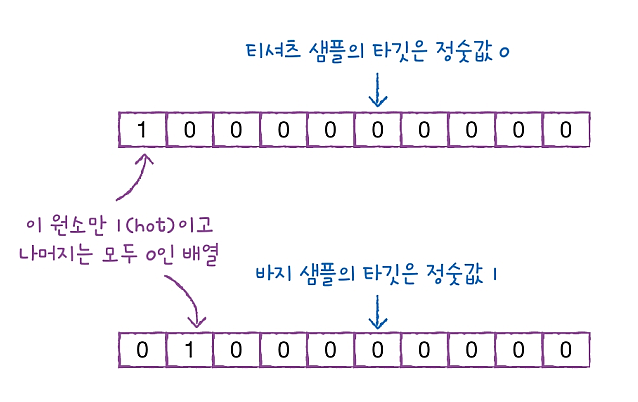

* 정수로된 타깃값을 사용해 크로스 엔트로피 손실을 계산한다는 것이 바로 sparse_categorical_crossentropy
* 타깃값을 one-hot encoding으로 준비했다면 compile() 메서드에 손실 함수를 categorical_crossentropy로 지정 
* 평가 지표로는 정확도로 설정

In [14]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [15]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5


2023-04-19 11:01:33.646613: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-19 11:01:33.792982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 9s 5ms/step - loss: 0.6070 - accuracy: 0.7950
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4787 - accuracy: 0.8392
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4558 - accuracy: 0.8486
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4443 - accuracy: 0.8521
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4366 - accuracy: 0.8561


In [16]:
model.evaluate(val_scaled, val_target)

 41/375 [==>...........................] - ETA: 1s - loss: 0.4331 - accuracy: 0.8506

2023-04-19 11:02:14.433032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 1s 4ms/step - loss: 0.4416 - accuracy: 0.8507


[0.4415982961654663, 0.8507499694824219]

## 참고

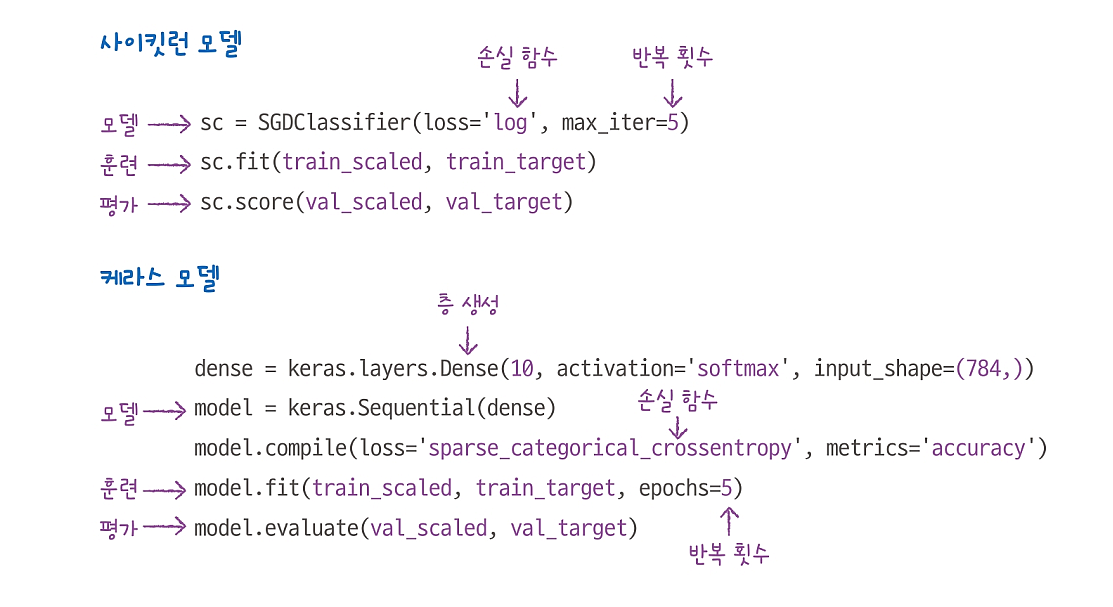

# 확인문제 1
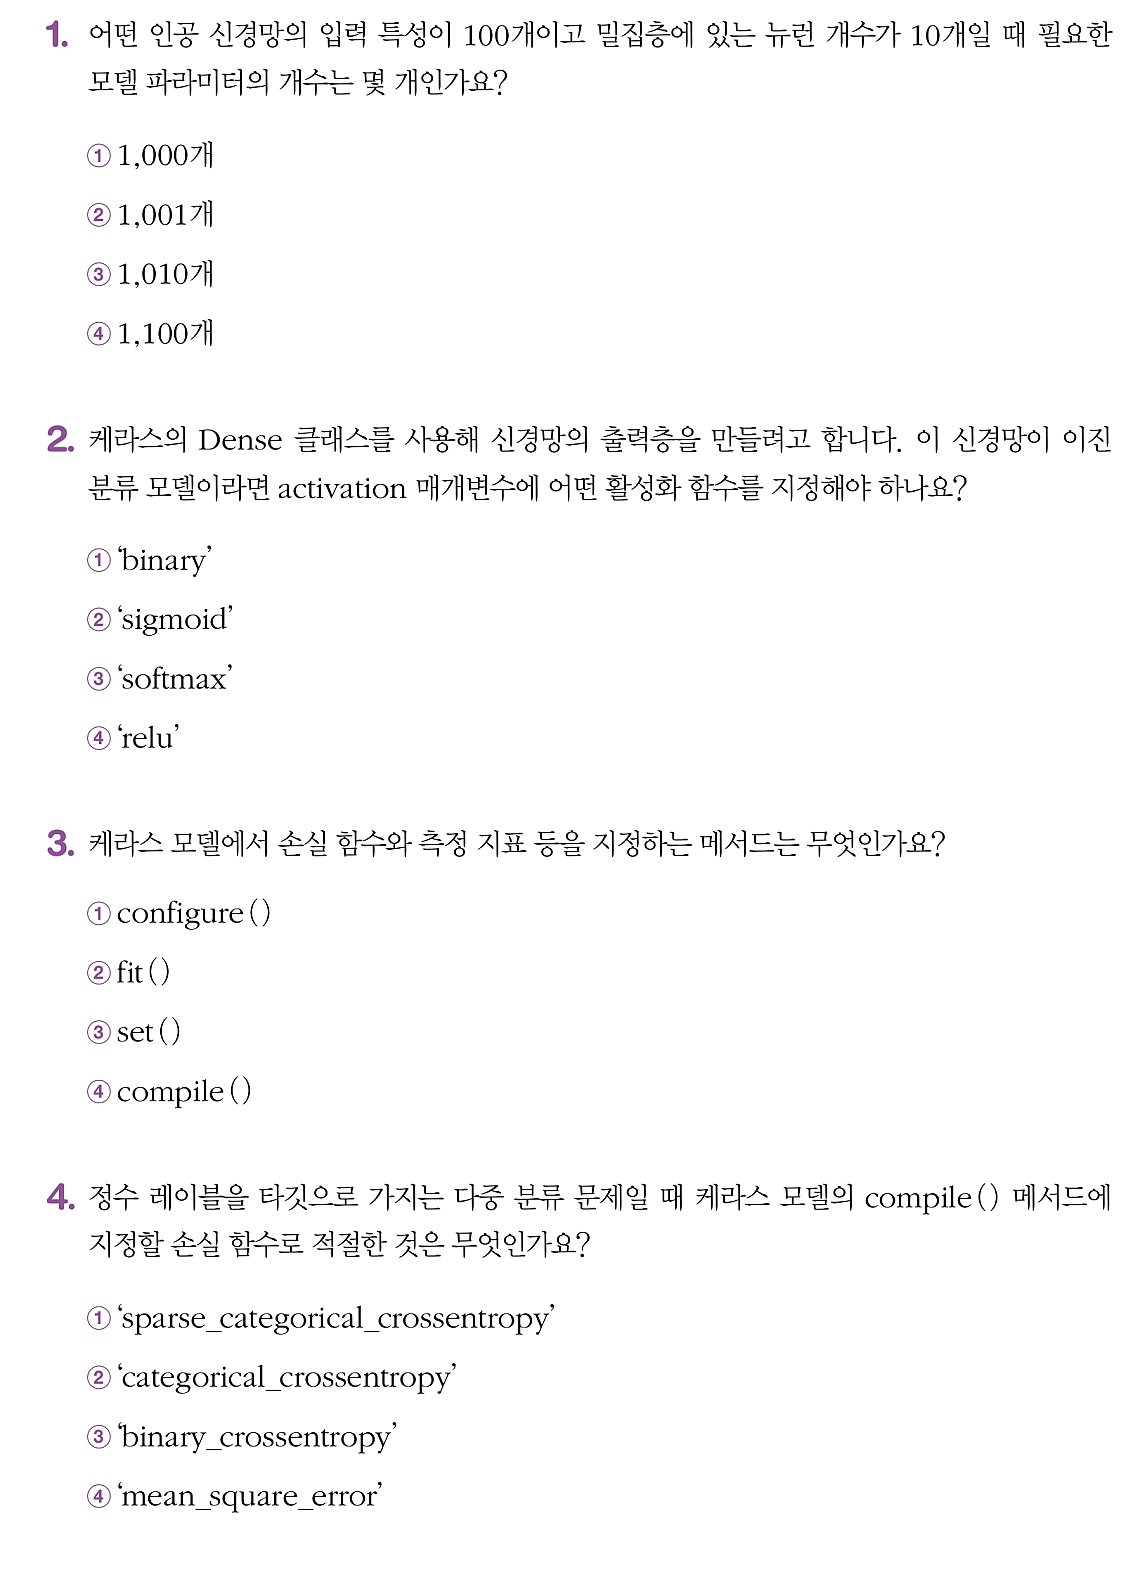

# 심층 신경망

## 2개의 층

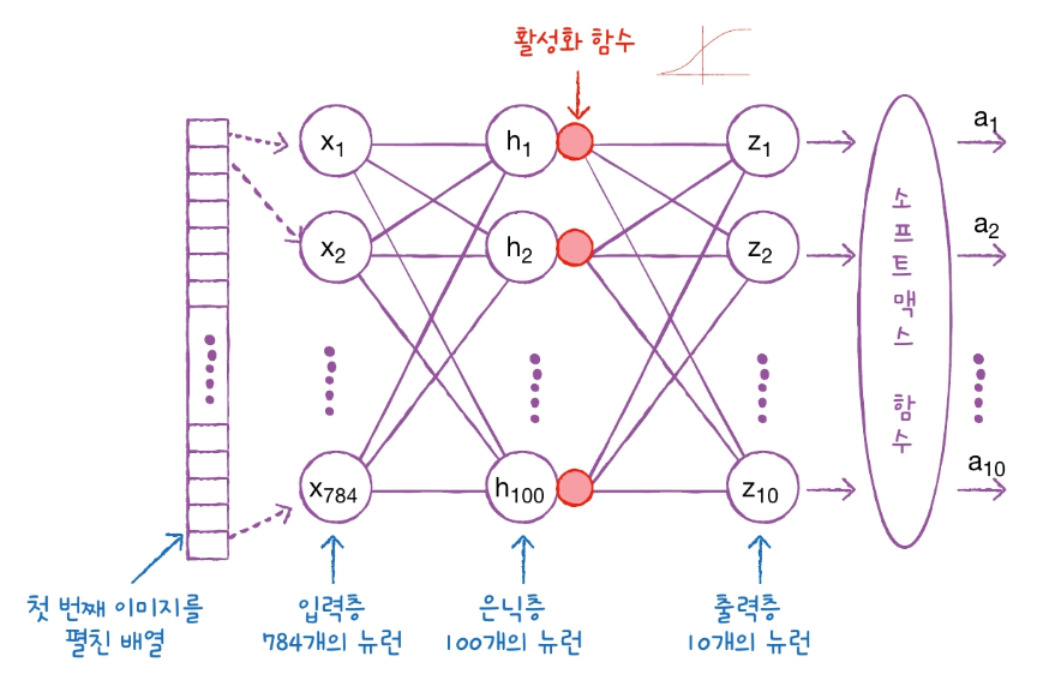 

* 입력층과 출력층 사이에 있는 모든 층을 은닉층(Hidden layer)이라고 부릅니다. 
* 은닉층에는 주황색 원으로 활성화 함수가 표시되어 있습니다. 활성화 함수는 신경망 층의 선형 방정식의 계산 값에 적용하는 함수입니다. 
* 분류 문제를 위한 신경망의 출력층에는 시그모이드 함수나 소프트맥스 함수를 활의 성화 함수로 사용합니다. 
    * 이진 분류일 경우 시그모이드 함수를 사용하고 다중 분류일 경우 소프트맥스 함수를 사용합니다. 
    * 은닉층의 활성화 함수는 비교적 자유롭습니다.
  
-----
* 회귀를 위한 신경망의 출력층의 결과는 임의의 어떤 숫자이므로 활성화 함수를 적용할 필요가 없습니다. 즉 출력층의 선형 방정식의 계산을 그대로 출력합니다. 
* 이렇게 하려면 Dense 층의 activation 매개변수에 아무런 값을 지정하지 않습니다. 


### 활성화 함수를 왜 적용하는가?
* 2개의 선형 방정식을 사용해서 예를 들어 보겠습니다. 
* 아래 그림에서 왼쪽의 첫 번째 식에서 계산된 b가 두 번째 식에서 c를 계산하기 위해서 사용됩니다. 하지만 두 번째 식에 첫 번째 식을 대입하면 오른쪽 그림처럼 하나로 합쳐질 수 있습니다. 이렇게 되면 b는 사라집니다. 
* 결국 b가 하는 일이 없는 셈입니다. 

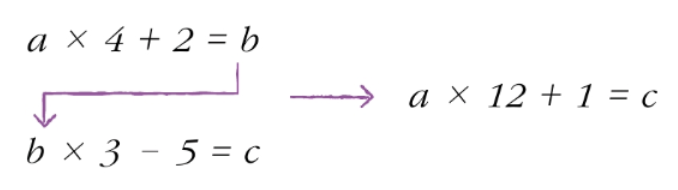


* 신경망도 마찬가지입니다. 은닉층에서 선형적인 산술 계산만 수행한다면 수행 역할이 없는 셈이 됩니다. 
* 선형 계산을 적당하게 비선형적으로 비틀어 주어야 합니다. 그래야 다음 층의 계산과 단순히 합쳐지지 않고 나름의 역할을 할 수 있습니다. 

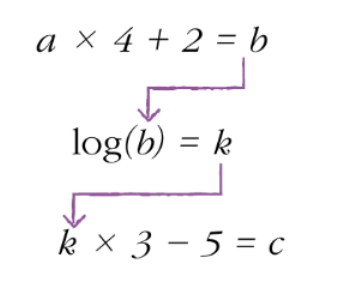


## 대표적인 활성화 함수(시그모이드)
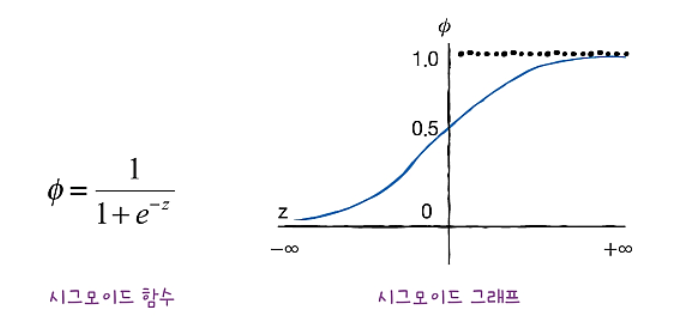

## 은닉층을 가진 신경망 설계

* dense1이 은닉층이고 100개의 뉴런을 가진 밀집충 
* 활성화는 sigmoid 사용 
* input_shape 매개변수는 입력의 크기 784로 지정 
* 은닉층의 뉴런의 개수를 정하는 특별한 기준은 없기 때문에 사용자가 지정 
* 한 가지 제약 사항이 있다면 적어도 출력층의 뉴런보다는 많게 만들어야 한다는 점 
* 클래스 10개에 대한 확률을 예측해야 하는데 이전 은닉층의 뉴런이 10개보다 적다면 부족한 정보가 전달될 것입니다. 
----------
* dense2는 출력층입니다. 
* 10개의 클래스를 분류하므로 10개의 뉴런을 두었고 활성화 함수는 소프트맥스 함수로 지정
------------
* Sequential 클래스의 객체를 만들 때 여러 개의 층을 추가하려면 아래와 같이 dense1과 dense2를 리스트로 만들어 전달합니다. 
* 주의해야 할 점은 출력층을 가장 마지막에 두어야 한다는 점 

In [17]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')
model = keras.Sequential([dense1, dense2])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


* 층의 이름을 지정하지 않으면 dense라고 이름을 자동을 붙입니다. 
* 출력 크기를 보면 None, 100 입니다. 첫 번째 차원은 샘플의 개수를 나타냅니다. 
* 샘플의 개수가 아직 정의되어 있지 않기 때문에 None입니다. 
* fit() 메서드에 훈련 데이터를 주입하면 이 데이터를 한 번에 모두 사용하지 않고 잘게 나누어 여러 번 걸쳐 미니배치 경사 하강법 단계를 수행합니다. 
* 케라스의 기본 미니배치 크기는 32입니다. 이 값을 fit() 메서드에서 batch_size 매개변수로 변경할 수 있습니다. 

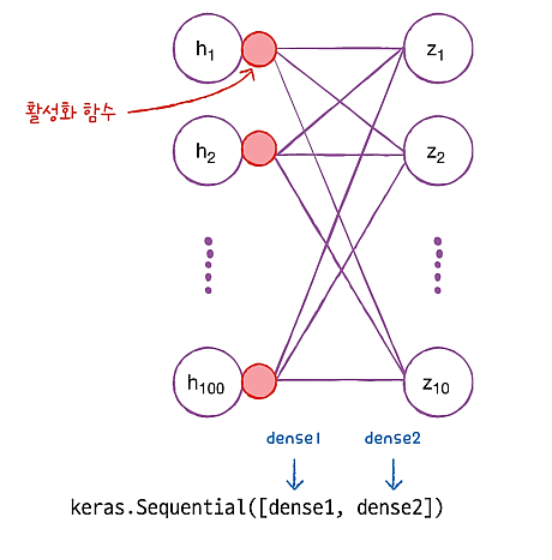


* 층의 이름을 지정하지 않으면 dense라고 이름을 자동을 붙입니다. 
* 출력 크기를 보면 None, 100 입니다. 첫 번째 차원은 샘플의 개수를 나타냅니다. 
* 샘플의 개수가 아직 정의되어 있지 않기 때문에 None입니다. 
* fit() 메서드에 훈련 데이터를 주입하면 이 데이터를 한 번에 모두 사용하지 않고 잘게 나누어 여러 번 걸쳐 미니배치 경사 하강법 단계를 수행합니다. 
* 케라스의 기본 미니배치 크기는 32입니다. 이 값을 fit() 메서드에서 batch_size 매개변수로 변경할 수 있습니다. 

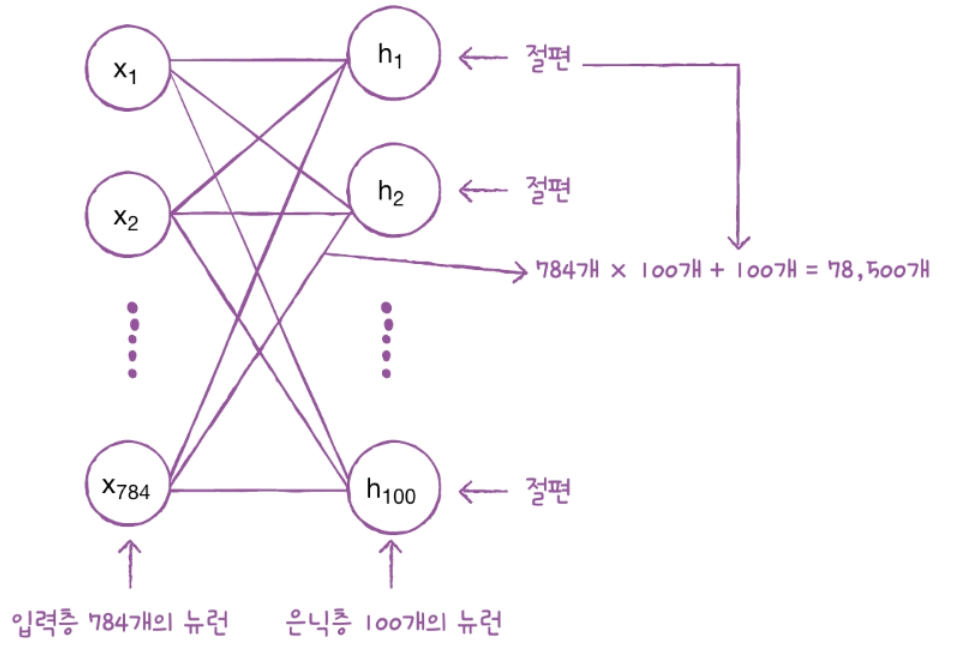


* 두 번째의 층의 출력 크기는 (None, 10)입니다. 
* 배치 차원은 동일하게 None이고 출력 뉴런 개수가 10개이기 때문입니다. 

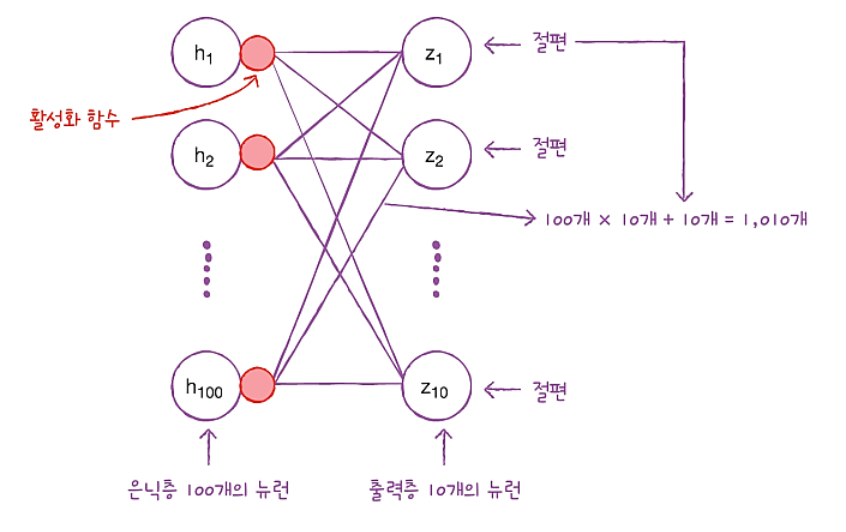

* 100개의 은닉층 뉴런과 10개의 출력층 뉴런이 모두 연결되고 출력층의 뉴런마다 하나의 절편이 있기 때문에 총 1,010개의 모델 파라미터가 있습니다. 

## 층을 추가하는 다른 방법
### 방법 1
* Sequential 클래스의 생성자 안에서 바로 Dense 클래스의 객체를 만들수도 있습니다.

In [18]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden1'),
    keras.layers.Dense(100, activation='sigmoid',  name='hidden2'),
    keras.layers.Dense(100, activation='relu',  name='hidden3'),
    keras.layers.Dense(10, activation='softmax', name='output')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 100)               78500     
                                                                 
 hidden2 (Dense)             (None, 100)               10100     
                                                                 
 hidden3 (Dense)             (None, 100)               10100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


### 방법 2
* Sequential 클래스의 객체를 만들고 이 객체의 add() 메서드를 호출하여 층을 추가하는 방법

model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

In [19]:
# 방법1이든 방법2이든 compile과 학습은 동일하다. 
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5


2023-04-19 11:12:32.555338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 13s 8ms/step - loss: 0.6376 - accuracy: 0.7732
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4317 - accuracy: 0.8440
Epoch 3/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3886 - accuracy: 0.8597
Epoch 4/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3613 - accuracy: 0.8681
Epoch 5/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3415 - accuracy: 0.8759


In [20]:
# weights 값을 출력하고 싶다면 weights 변수의 값을 출력하면 된다. 
model.weights

[<tf.Variable 'hidden1/kernel:0' shape=(784, 100) dtype=float32, numpy=
 array([[ 0.00185821,  0.04277924,  0.02884702, ..., -0.03497583,
         -0.04857091,  0.03825084],
        [-0.01572627,  0.03455622, -0.0429588 , ..., -0.00184849,
         -0.025434  , -0.04098253],
        [-0.11011036,  0.01908523, -0.10551751, ...,  0.25241366,
          0.12889087, -0.0448042 ],
        ...,
        [-0.15842974,  0.00550395, -0.08658445, ..., -0.15353249,
          0.42645147,  0.05034028],
        [-0.06329934, -0.03145282,  0.11762518, ..., -0.16986115,
          0.12267308, -0.03857715],
        [ 0.04558796,  0.06505914, -0.07617571, ..., -0.01606025,
          0.06606007, -0.04390367]], dtype=float32)>,
 <tf.Variable 'hidden1/bias:0' shape=(100,) dtype=float32, numpy=
 array([ 0.033508  ,  0.12376877, -0.14070648, -0.10060094, -0.20731474,
        -0.23000176,  0.05816175, -0.04199008,  0.11728696,  0.11092521,
         0.02507441,  0.09755659, -0.0168242 , -0.03269609, -0.06097834,


## 렐루 활성화 함수
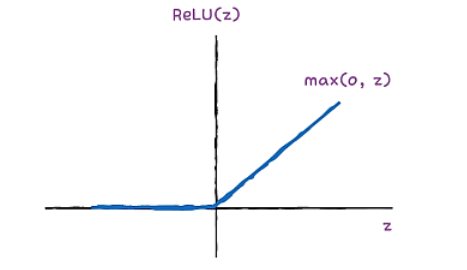

* 렐루 함수는 이미지 분류 모델의 은닉층에 많이 사용하는 활성화 함수입니다. 
* 시그모이드 함수는 층이 많을수록 활성화 함수의 양쪽 끝에서 변화가 작기 때문에 학습이 어려워집니다. 렐루함수는 이런 문제가 없으며 계산도 간단합니다. 
* 렐루 함수는 입력이 양수일 경우 마치 활성화 함수가 없는 것처럼 그냥 입력을 통과시키고 음수일 경우에는 0으로 만듭니다. 
* 렐루 함수는 특히 이미지 처리에서 좋은 성능을 낸다고 알려져 있습니다. 
-----
* Flatten 클래스는 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할만 합니다. 곱해지는 가중치나 절편은 없습니다. 
* Flatten 클래스를 층처럼 입력층과 은닉층 사이에 추가하기 때문에 이를 층이라 부릅니다. Flatten 층은 다음 코드처럼 입력층 바로 뒤에 추가합니다. 

In [21]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [22]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
   8/1500 [..............................] - ETA: 10s - loss: 1.9376 - accuracy: 0.3359 

2023-04-19 11:15:39.748851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 9s 6ms/step - loss: 0.5301 - accuracy: 0.8121
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3887 - accuracy: 0.8594
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3541 - accuracy: 0.8743
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3332 - accuracy: 0.8806
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3199 - accuracy: 0.8859


In [23]:
model.evaluate(val_scaled, val_target)

 39/375 [==>...........................] - ETA: 1s - loss: 0.3543 - accuracy: 0.8806

2023-04-19 11:16:25.818728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 2s 4ms/step - loss: 0.3632 - accuracy: 0.8794


[0.3631895184516907, 0.8794166445732117]

## 옵티마이저
* 케라스는 기본적으로 미니배치 경사 하강법을 사용하며 미니배치 개수는 32개입니다. 
* fit() 메서드의 batch_size 매개변수에서 이를 조정할 수 있습니다. 
* 케라스의 기본 경사 하강법 알고리즘인 RMSprop을 사용합니다. 
* 케라스는 다양한 종류의 경사 하강법 알고리즘을 제공합니다. 이들을 옵티마이저(Optimizer)라고 부릅니다. 
* 옵티마이저를 선택하는 방법은 아래와 같이 2가지 방식이 있습니다. 
* 옵티마이저의 SGD 클래스를 사용하면 학습률등, 파라미터 값을 변경할 수 있습니다. 

In [24]:
# optimizer를 선택하는 방법 1
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [25]:
# optimizer를 선택하는 방법 2
sgd = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

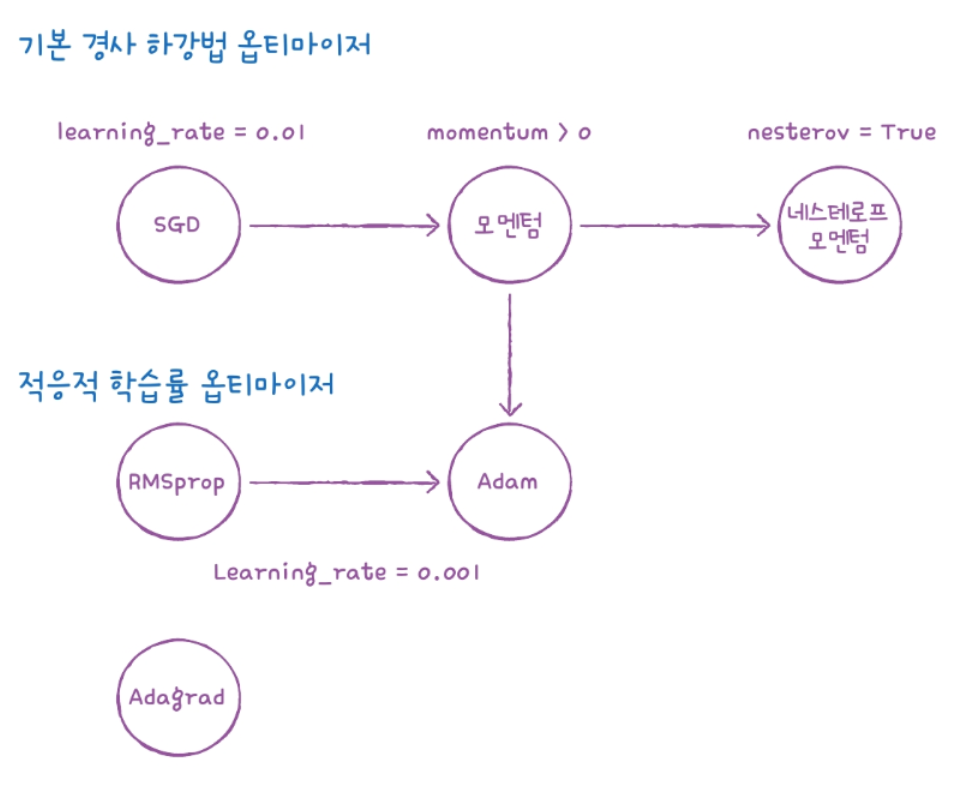

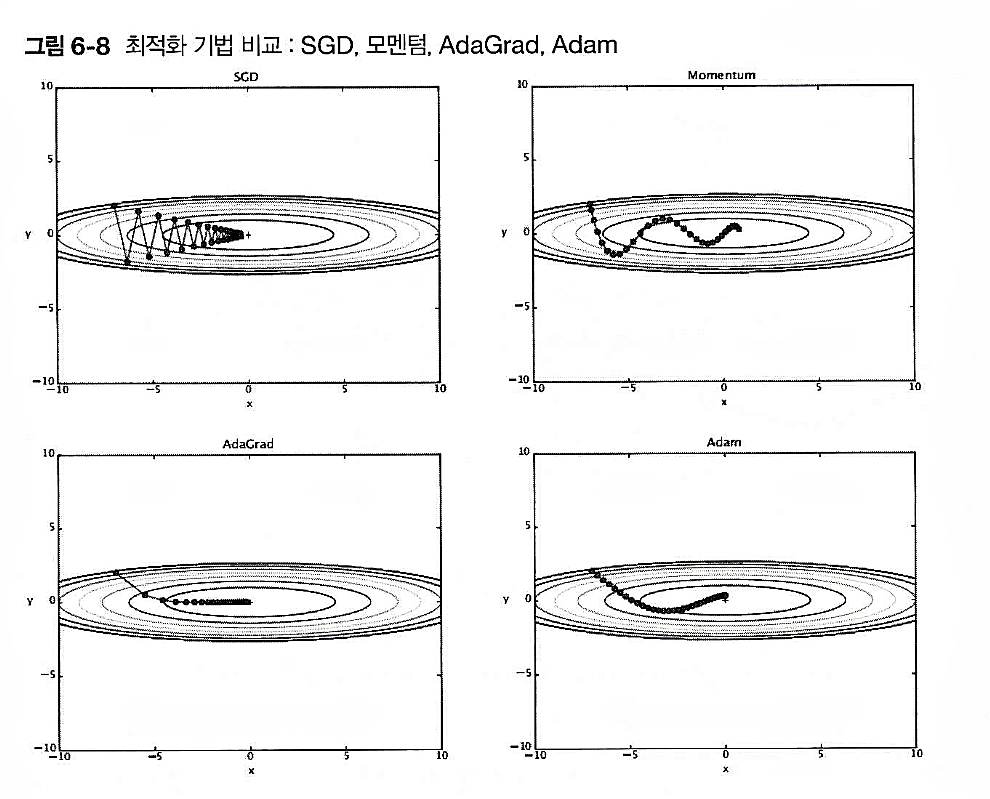

* 기본 경사 하강법 옵티마이저는 모두 SGD 클래스에서 제공합니다. SGD 클래스의 momentum 매개변수의 기본값은 0입니다. 
* 0보다 큰 값으로 지정하면 마치 이전의 그레디언트를 가속도처럼 사용하는 모멘텀 최적화(momentum optimization)를 사용합니다. 
* 보통 momentum 매개변수는 0.9 이상을 지정합니다. 
* 다음처럼 SGD 클래스의 nesterov 매개변수를 기본값으로 False에서 True로 바꾸면 네스테로프 모멘텀 최적화(네스테로프 가속 경사)를 사용합니다. 
* 네스테로프 모멘텀은 모멘텀 최적화를 2번 반복하여 구현합니다. 대부분의 경우 네스테로프 모멘텀 최적화가 기본 확률적 경사 하강법보다 더 나은 성능을 제공합니다. 
---------
* 모델이 최적점에 가까이 갈수록 학습률을 낮출 수 있습니다. 이렇게 하면 안정적으로 최적점에 수렴할 가능성이 높습니다. 
* 이런 학습률을 적응적 학습률(adaptive learning rate)이라고 합니다. 이런 방식들은 학습률 매개변수를 튜닝하는 수고를 덜 수 있는 것이 장점입니다. 
* 적응적 학습률을 사용하는 대표적인 옵티마이저는 Adagrad와 RMSprop이 있습니다. 
* 각각 compile() 메서드의 optimizer 매개변수에 'adagrad'와 'rmsprop'으로 지정할 수 있습니다. 
    * 기본값으로 rmsprop이 설정되어 있습니다. 
* Adam은 모멘텀과 적응적 학습률을 융합한 방식입니다. 

In [26]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)
adagrad = keras.optimizers.Adagrad()
rmsprop = keras.optimizers.RMSprop()

In [27]:
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [28]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
   7/1500 [..............................] - ETA: 12s - loss: 0.4070 - accuracy: 0.8661 

2023-04-19 11:20:53.979651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 9s 6ms/step - loss: 0.3093 - accuracy: 0.8901
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2987 - accuracy: 0.8943
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2904 - accuracy: 0.8965
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2831 - accuracy: 0.9011
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2763 - accuracy: 0.9022


In [29]:
model.evaluate(val_scaled, val_target)

 38/375 [==>...........................] - ETA: 1s - loss: 0.4114 - accuracy: 0.8791

2023-04-19 11:22:01.515711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 2s 4ms/step - loss: 0.4136 - accuracy: 0.8810


[0.4136340618133545, 0.8809999823570251]

# 손실 곡선

In [28]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

model = model_fn()

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5341 - accuracy: 0.8120
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3923 - accuracy: 0.8587
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3548 - accuracy: 0.8725
Epoch 4/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3311 - accuracy: 0.8812
Epoch 5/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3152 - accuracy: 0.8869
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3031 - accuracy: 0.8922
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2936 - accuracy: 0.8951
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2860 - accuracy: 0.8989
Epoch 9/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2781 - accuracy: 0.9021
Epoch 10/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.272

* history 변수에는 훈련 측정값이 딕셔너리 형태로 저장되어 있습니다. 
* 케라스는 기본적으로 에포크마다 손실을 계산합니다. 정확도는 compile() 메서드에서 metrics 매개변수에 'accuracy'를 추가했기 때문에 history 속성에 포함되었습니다. 

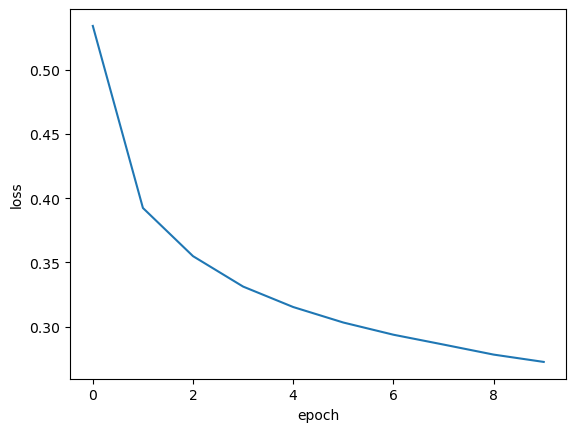

In [30]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('7_3-01', dpi=300)
plt.show()

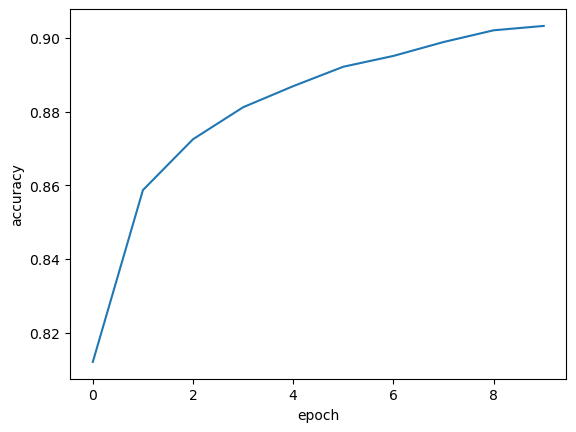

In [31]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.savefig('7_3-02', dpi=300)
plt.show()

## 검증 손실
* 에포크에 따른 과대적합과 과소적합을 파악하려면 훈련 세트에 대한 점수뿐만 아니라 검증 세트에 대한 점수도 필요합니다. 
* 따라서 앞에서처럼 훈련 세트의 손실만 그려서는 안됩니다. 

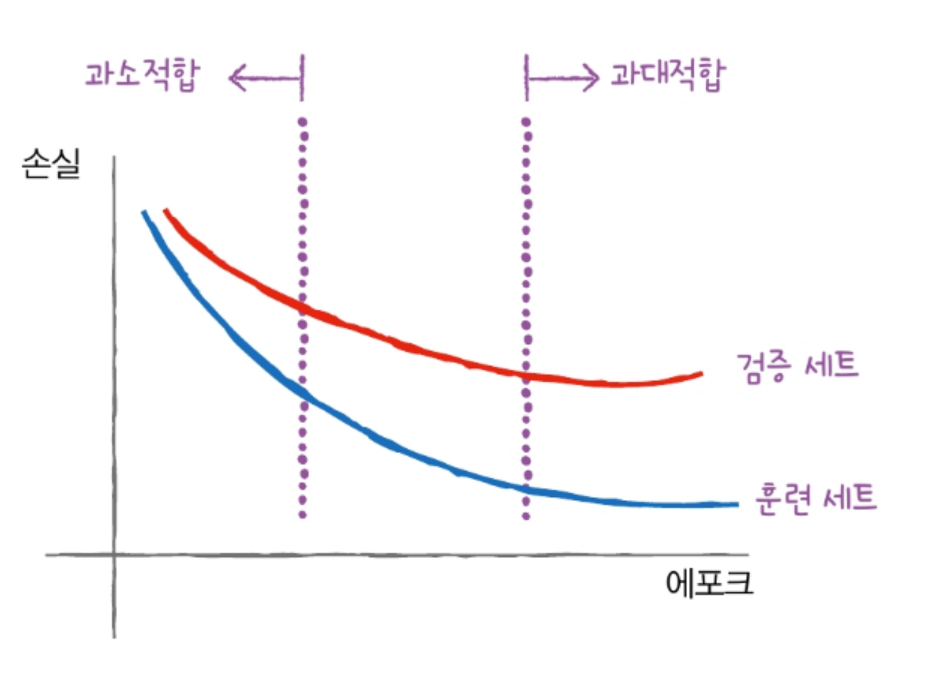

* 모델이 최적화하는 대상은 정확도가 아니라 손실 함수입니다. 이따금 손실 감소에 비례하여 정확도가 높아지지 않는 경우도 있습니다. 
* 따라서 모델이 잘 훈련되었는지 판단하려면 정확도보다는 손실 함수의 값을 확인하는 것이 더 낫습니다. 

In [32]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=1, 
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5320 - accuracy: 0.8128 - val_loss: 0.4678 - val_accuracy: 0.8239
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3959 - accuracy: 0.8570 - val_loss: 0.5225 - val_accuracy: 0.8175
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3565 - accuracy: 0.8717 - val_loss: 0.3623 - val_accuracy: 0.8703
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3349 - accuracy: 0.8785 - val_loss: 0.3382 - val_accuracy: 0.8816
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3195 - accuracy: 0.8845 - val_loss: 0.3500 - val_accuracy: 0.8798
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3048 - accuracy: 0.8905 - val_loss: 0.3731 - val_accuracy: 0.8751
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2946 - accuracy: 0.8922 - val_loss: 0.3822 - val_accuracy:

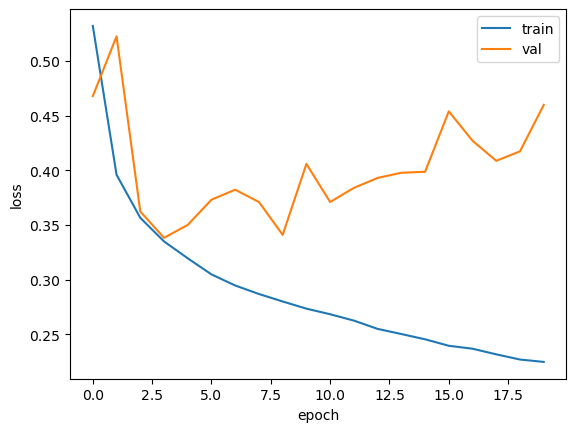

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-04', dpi=300)
plt.show()

* 5번째 에포크 만에 검증 손실이 상승하기 시작합니다. 
* 훈련 손실은 꾸준히 감소하기 때문에 전형적인 과대적합 모델이 만들어집니다. 
* 검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실이 줄어들 뿐만 아니라 검증 세트에 대한 정확도도 증가할 것입니다. 
-------
* 옵티마이저 하이퍼파라미터를 조정하여 과대적합을 완화시킬 수 있는지 확인해보겠습니다. 
* 기본 RMSprop 옵티마이저는 많은 문제에서 잘 동작합니다. 만약 이 옵티마이저 대신 다른 옵티마이저를 테스트해 본다면 Adam이 좋은 선택입니다. 
* Adam은 적응적 학습률을 사용하기 때문에 에포크가 진행되면서 학습률의 크기를 조정할 수 있습니다. 

model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=1, 
                    validation_data=(val_scaled, val_target))

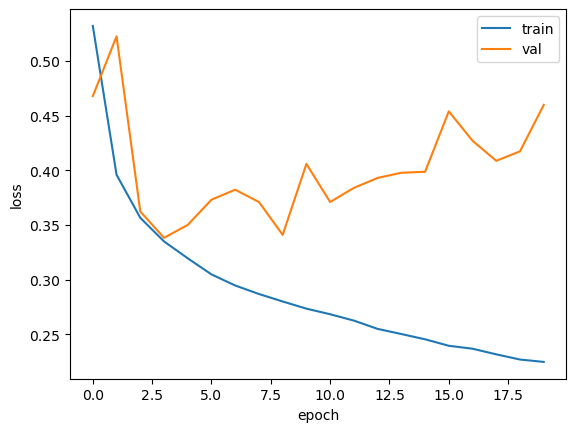

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-05', dpi=300)
plt.show()

## 드롭아웃
* 드롭아웃은 인공지능의 3대 거장 제프리 힌튼이 소개했습니다.
* 아래 그림처럼 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(뉴런의 출력을 0으로 만들어) 과대적합을 막습니다. 

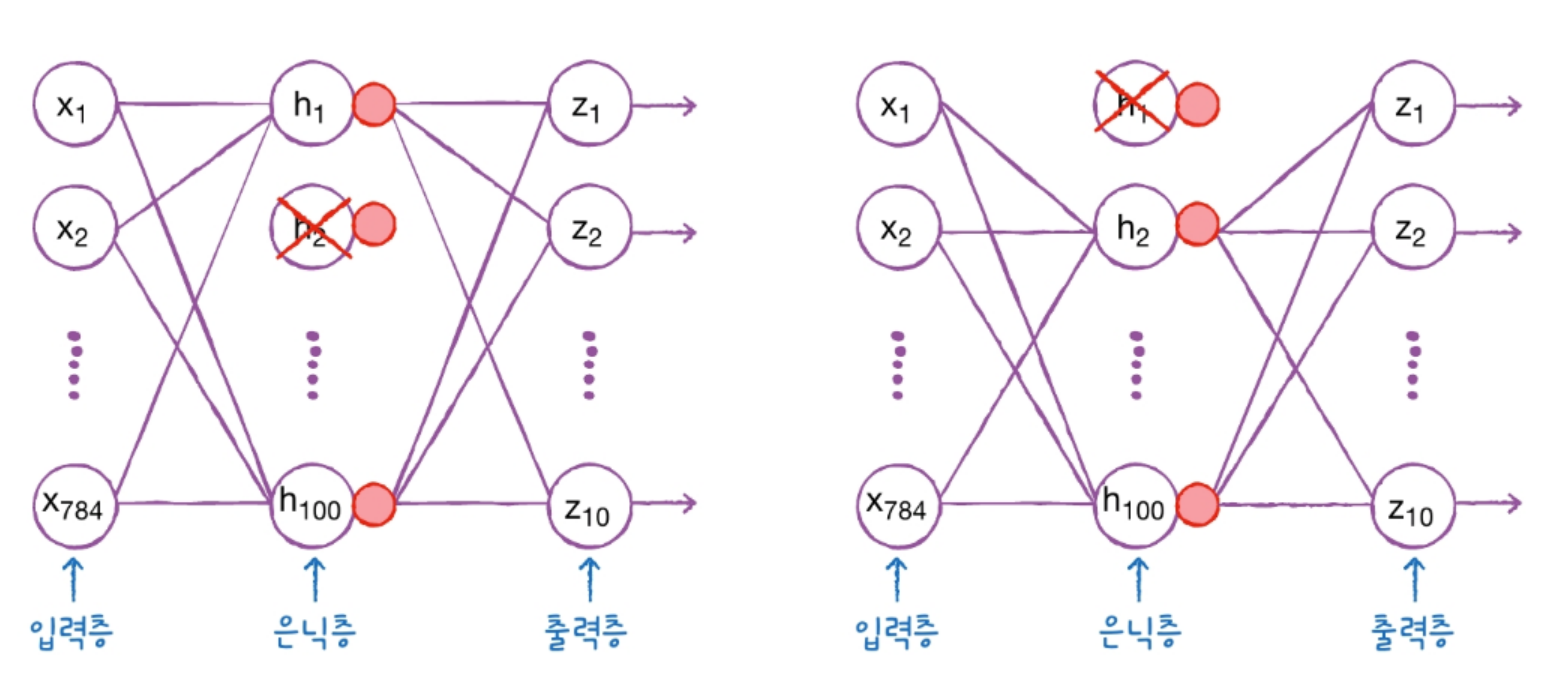

* 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 합니다. 
* 일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 예측을 만들 수 있을 것입니다. 

In [35]:
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=1, 
                    validation_data=(val_scaled, val_target))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5976 - accuracy: 0.7895 - val_loss: 0.4324 - val_accuracy: 0.8453
Epoch 2/20
1500/1500 [================

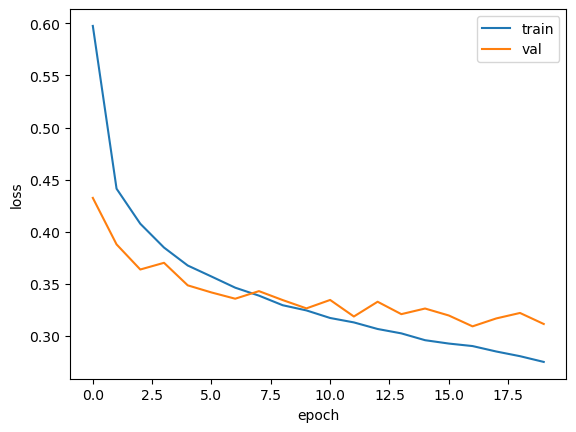

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-06', dpi=300)
plt.show()

## 모델 저장과 복원
* 케라스 모델은 훈련된 모델의 파라미터를 저장하는 간편한 save_weights() 메서드를 제공합니다. 
* 기본적으로 이 메서드는 텐서플로의 체크포인트 포맷으로 저장하지만 파일의 확장자가 h5일 경우 HDF5 포맷으로 저장합니다. 

In [37]:
model.save_weights('model-weights.h5')

In [38]:
# 저장된 모델 로드하기 
model = model_fn(keras.layers.Dropout(0.3))
model.summary()
model.load_weights('model-weights.h5')

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_12 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


* 과학적 표기법 변경 하기 

In [39]:
np.set_printoptions(precision=6, suppress=True)

* 모델의 predict() 메서드 결과에서 가장 큰 값을 고르기 위해 넘파이의 argmax() 함수를 사용합니다. 
* 이 함수는 배열에서 가장 큰 값의 인덱스를 반환합니다. 
* argmax() 함수의 axis=-1은 배열의 마지막 차원을 따라 최댓값을 선택합니다. 검증 세트는 2차원 배열이기 때문에 마지막 차원은 1이 됩니다. 

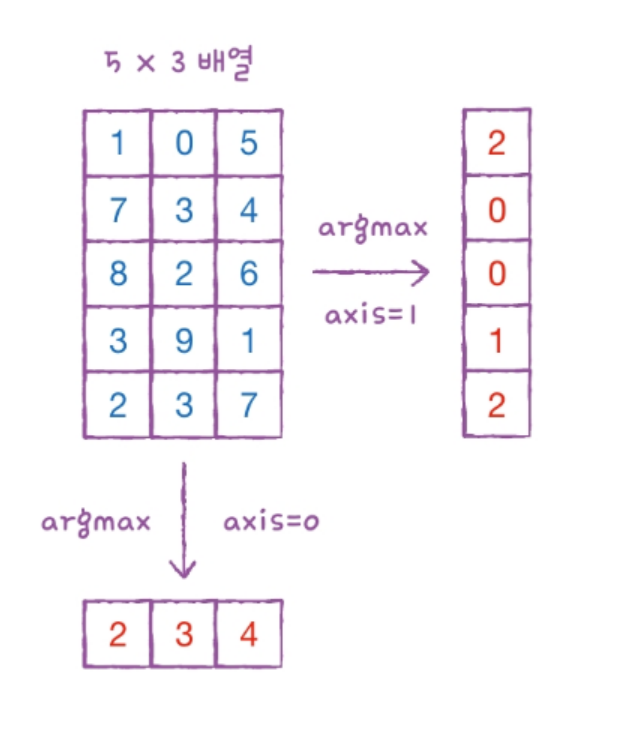



In [40]:
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 0s 808us/step
0.8883333333333333


## 콜백
* 콜백함수란 어떤 이벤트에 의해 호출되어지는 함수를 의미하고 케라스에서는 훈련 과정 중간에 어떤 작업을 수행할 때 사용합니다. 
* keras.callbacks 패키지 아래에 있는 클래스입니다. 
* fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용합니다. 
* ModelCheckpoint 콜백은 기본적으로 최상의 검증 점수를 만드는 모델을 저장합니다. 
    * 저장될 파일 이름은 best-model.h5로 지정하여 콜백을 적용해 보겠습니다. 

In [41]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')

model.fit(train_scaled, train_target, epochs=20, verbose=1, 
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5898 - accuracy: 0.7934 - val_loss: 0.4285 - val_accuracy: 0.8499
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4377 - accuracy: 0.8426 - val_loss: 0.3924 - val_accuracy: 0.8574
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4022 - accuracy: 0.8528 - val_loss: 0.3801 - val_accuracy: 0.8597
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3807 - accuracy: 0.8605 - val_loss: 0.3561 - val_accuracy: 0.8677
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3637 - accuracy: 0.8673 - val_loss: 0.3526 - val_accuracy: 0.8727
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3562 - accuracy: 0.8688 - val_loss: 0.3430 - val_accuracy: 0.8737
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3440 - accuracy: 0.8736 - val_loss: 0.3409 - val_accuracy:

In [42]:
model = keras.models.load_model('best-model.h5')
# 텐서플로 2.3에서는 버그(https://github.com/tensorflow/tensorflow/issues/42890) 때문에 compile() 메서드를 호출해야 합니다.
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 933us/step - loss: 0.3284 - accuracy: 0.8856


[0.3284154236316681, 0.8855833411216736]

* 에포크의 횟수 만큼 훈련을 진행하다보면 과적합이 발생하기 때문에 어느 시점 이상은 훈련을 계속할 필요성이 없어집니다. 
* 이때 훈련을 중지하면 컴퓨터 자원과 시간을 절약할 수 있습니다. 
* 이렇게 과대적합이 시작되기 전에 훈련을 미리 중지하는 것을 조기 종료(ealry stopping)라고 부릅니다. 
* 조기 종료는 훈련 에포크 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아주기 때문에 규제 방법 중 하나로 생각할 수도 있습니다. 
* 케라스에서는 EarlyStopping 콜백 함수를 제공합니다. 
* patience=2로 지정하면 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지시킵니다. 
* restore_best_weights 매개변수를 True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌립니다. 


In [43]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, 
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=1, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5985 - accuracy: 0.7890 - val_loss: 0.4321 - val_accuracy: 0.8426
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4423 - accuracy: 0.8397 - val_loss: 0.3930 - val_accuracy: 0.8521
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4073 - accuracy: 0.8508 - val_loss: 0.3721 - val_accuracy: 0.8631
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3841 - accuracy: 0.8588 - val_loss: 0.3571 - val_accuracy: 0.8694
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3700 - accuracy: 0.8640 - val_loss: 0.3583 - val_accuracy: 0.8683
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3561 - accuracy: 0.8704 - val_loss: 0.3501 - val_accuracy: 0.8719
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3448 - accuracy: 0.8725 - val_loss: 0.3480 - val_accuracy:

In [44]:
# 조기 종료된 epoch 확인하기 
print(early_stopping_cb.stopped_epoch)

9


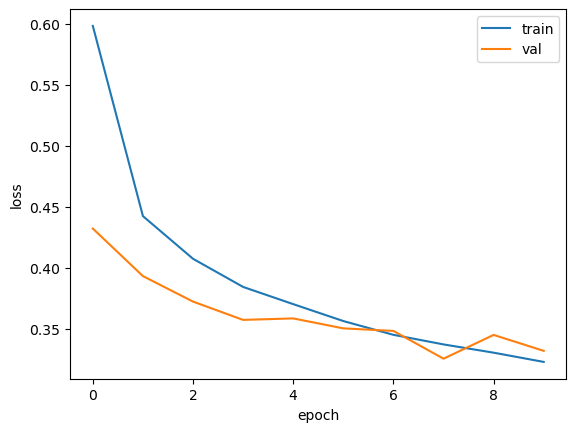

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-07', dpi=300)
plt.show()

### 텐서보드 사용하기 

In [47]:
tensorboard_callback = keras.callbacks.TensorBoard(log_dir="./logdir")

In [48]:
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb,tensorboard_callback])

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3284 - accuracy: 0.8773 - val_loss: 0.3420 - val_accuracy: 0.8714
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3230 - accuracy: 0.8805 - val_loss: 0.3270 - val_accuracy: 0.8805
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3169 - accuracy: 0.8827 - val_loss: 0.3334 - val_accuracy: 0.8823
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3136 - accuracy: 0.8830 - val_loss: 0.3201 - val_accuracy: 0.8857
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3063 - accuracy: 0.8855 - val_loss: 0.3296 - val_accuracy: 0.8796
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3020 - accuracy: 0.8876 - val_loss: 0.3363 - val_accuracy: 0.8811


In [49]:
%load_ext tensorboard
%tensorboard --logdir=./"./logdir" --port=6006

# 확인문제 

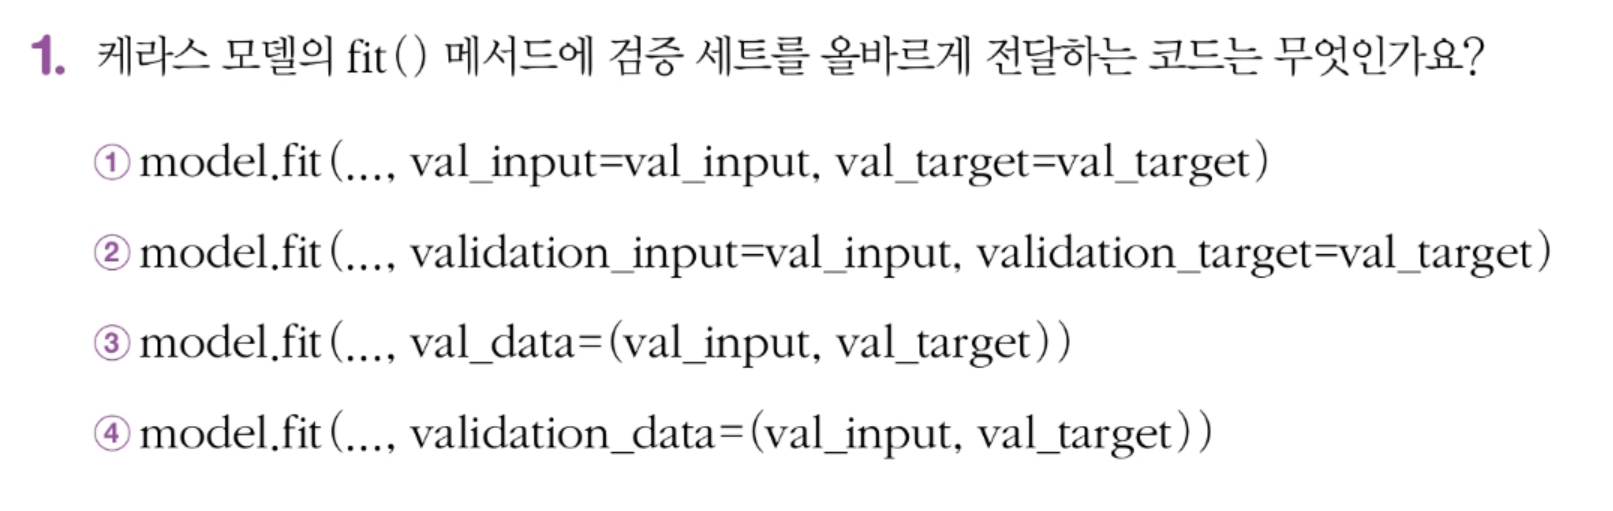

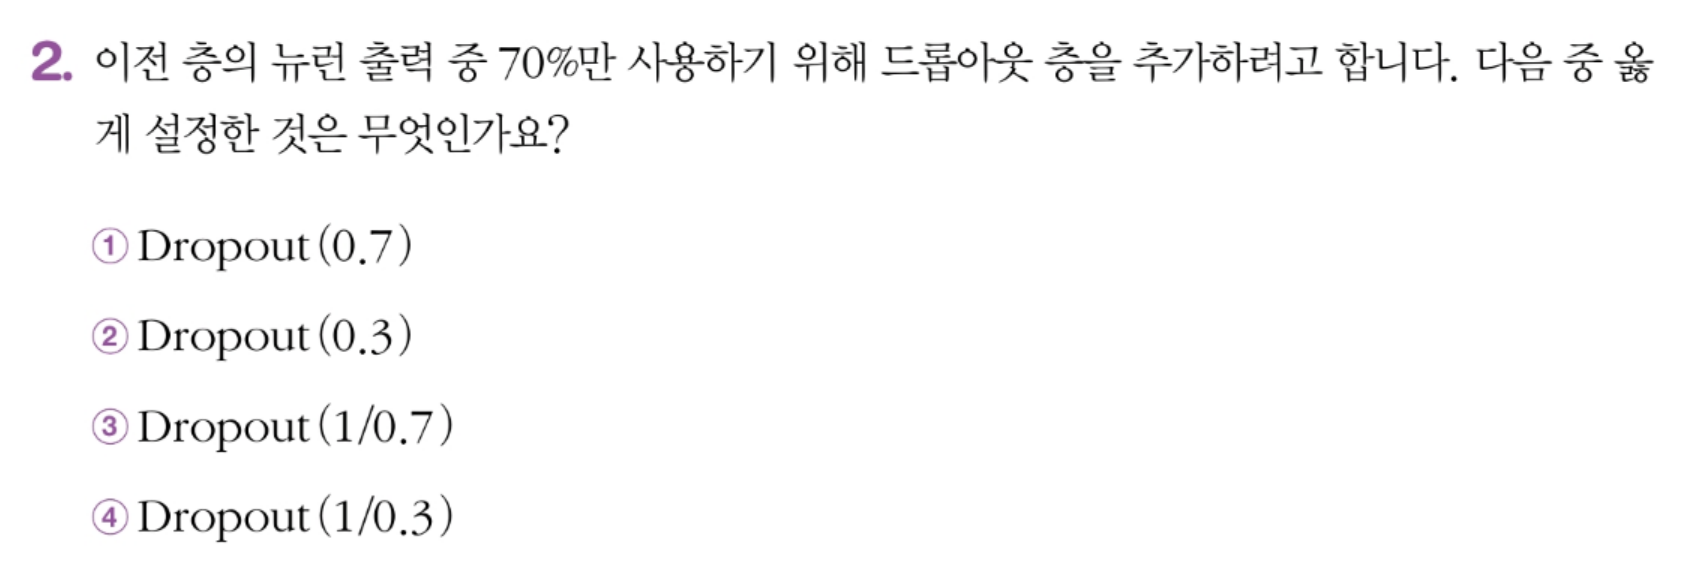

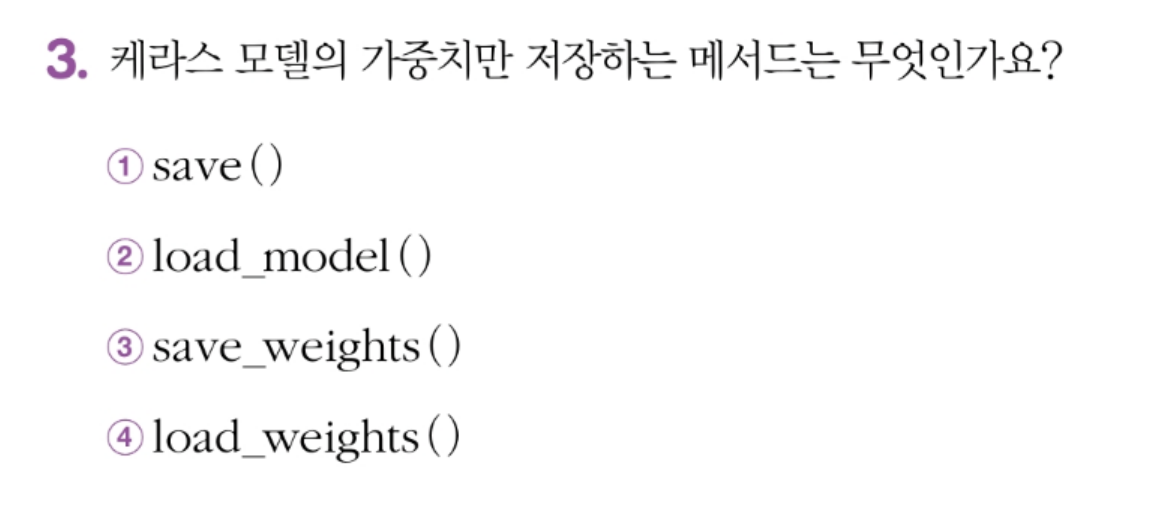

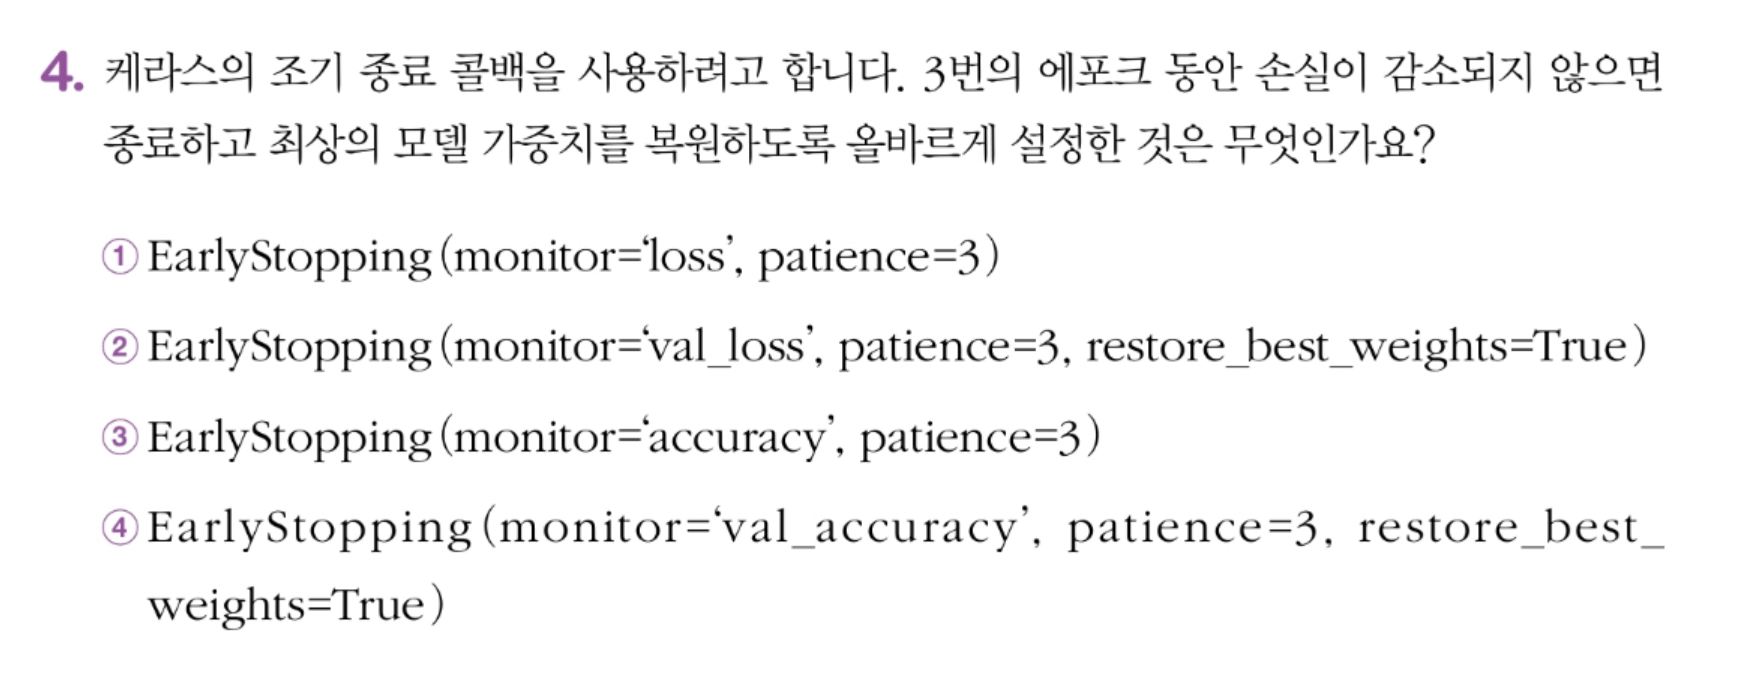